# Subscription Retention Rate

## Goal

Subscriptions are a great business model. There are so many advantages for businesses in having subscribers compared to single purchase users: revenue by customer is much higher, it is possible to cross-sell to the subscribers, future revenue is easily predictable, there is a significant cost (time/effort/etc.) for the customer in canceling the subscription, etc.

It is no surprise then that so many companies have subscription business models (or try very hard to come up with one!).

The goal of this challenge is to model subscription retention rate.

## Challenge Description

Company XYZ started a subscription model in January, 2015. You get hired as a first data scientist at the end of August and, as a first task, you are asked to help executives understand how the subscription model is doing.

Therefore, you decide to pull data from all the users who subscribed in January and see, for each month, how many of them unsubscribed.
In particular, your boss is interested in:

- A model that predicts monthly retention rate for the different subscription price points


- Based on your model, for each price point, what percentage of users is still subscribed after at least 12 months?


- How do user country and source affect subscription retention rate? How would you use these findings to improve the company revenue?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

19_Subscription_Retention_Rate.ipynb  subscription.csv


In [3]:
df = pd.read_csv('subscription.csv')
print(df.shape)
df.head(10)

(500000, 7)


,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0
5,790,"January, 2015",49,US,ads,3,0
6,12214,"January, 2015",49,France,ads,1,0
7,7341,"January, 2015",29,US,ads,8,1
8,1026,"January, 2015",99,Spain,ads,1,0
9,11647,"January, 2015",49,US,ads,3,0


- user_id : the id of the user. Unique by user.
- subscription_signup_date : when the user signed up for the subscription. It is always Jan, 2015 in this table.
- subscription_monthly_cost : how much the user pays each month for the subscription (USD)
- source : marketing acquisition channel (SEO/Ads/Friend Referral)
- billing_cycles : total billing cycles as of the end of August.
- is_active : whether the subscription is still active (1) or not (0). If billing cycles is 8, it means the user has still an active subscription.

In [4]:
df.isnull().sum()

user_id                      0
subscription_signup_date     0
subscription_monthly_cost    0
country                      0
source                       0
billing_cycles               0
is_active                    0
dtype: int64

In [5]:
df.subscription_signup_date.value_counts()

January, 2015    500000
Name: subscription_signup_date, dtype: int64

In [6]:
df.is_active.value_counts()

0    450001
1     49999
Name: is_active, dtype: int64

In [7]:
df.billing_cycles.value_counts()

1    287374
2     79838
8     49999
3     35198
4     19753
5     12631
6      8767
7      6440
Name: billing_cycles, dtype: int64

In [8]:
df.billing_cycles[df.is_active==1].value_counts()

8    49999
Name: billing_cycles, dtype: int64

## Question 1

A model that predicts monthly retention rate for the different subscription price points

In [9]:
df.subscription_monthly_cost.value_counts()

49    300397
29    146362
99     53241
Name: subscription_monthly_cost, dtype: int64

In [10]:
print(df[df.subscription_monthly_cost==29].shape[0])

for i in range(1,9):
    print(i, df[(df.subscription_monthly_cost==29) & (df.billing_cycles == i)].shape[0])

146362
1 57441
2 21818
3 12037
4 7787
5 5505
6 4136
7 3111
8 34527


In [11]:
df.country.value_counts()

US         91731
UK         91252
Germany    88944
France     51662
India      48027
Italy      47459
Spain      44987
China      35938
Name: country, dtype: int64

In [12]:
print(df[df.country=='US'].shape[0])

for i in range(1,9):
    print(i, df[(df.country=='US') & (df.billing_cycles == i)].shape[0])

91731
1 49855
2 15801
3 7834
4 4547
5 2925
6 2066
7 1458
8 7245


In [13]:
df.source.value_counts()

ads                414469
seo                 61103
friend_referral     24428
Name: source, dtype: int64

In [14]:
df.groupby(['subscription_monthly_cost','country','source','billing_cycles']).size().reset_index(name = 'counts')

,subscription_monthly_cost,country,source,billing_cycles,counts
0,29,China,ads,1,2981
1,29,China,ads,2,835
2,29,China,ads,3,527
3,29,China,ads,4,411
4,29,China,ads,5,366
5,29,China,ads,6,319
6,29,China,ads,7,288
7,29,China,ads,8,8108
8,29,China,friend_referral,1,107
9,29,China,friend_referral,2,15


### Groupby Cost

In [15]:
# First do a simple case:

df_cost = df.groupby(['subscription_monthly_cost','billing_cycles']).size().reset_index(name = 'counts')
df_cost

,subscription_monthly_cost,billing_cycles,counts
0,29,1,57441
1,29,2,21818
2,29,3,12037
3,29,4,7787
4,29,5,5505
5,29,6,4136
6,29,7,3111
7,29,8,34527
8,49,1,185145
9,49,2,53296


In [16]:
ratio_list = []
for cost in [29, 49, 99]:
    total = df[df.subscription_monthly_cost == cost].shape[0]
    ratio_list2 = [1]
    ratio = 1
    for i in range(0,7):
        ratio -= df_cost[df_cost.subscription_monthly_cost == cost].iloc[i,2]/total
        ratio_list2.append(ratio)
    ratio_list += ratio_list2

In [17]:
df_cost['ratio'] = ratio_list
df_cost

,subscription_monthly_cost,billing_cycles,counts,ratio
0,29,1,57441,1.000000
1,29,2,21818,0.607542
2,29,3,12037,0.458473
3,29,4,7787,0.376232
4,29,5,5505,0.323028
5,29,6,4136,0.285416
6,29,7,3111,0.257157
7,29,8,34527,0.235901
8,49,1,185145,1.000000
9,49,2,53296,0.383666


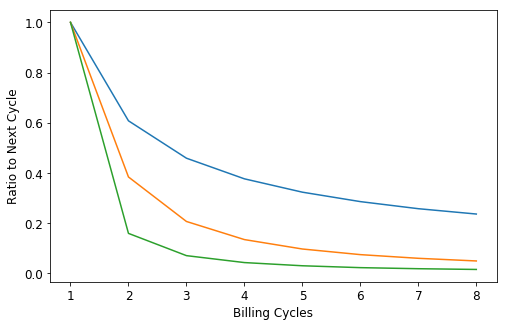

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

for cost in [29, 49, 99]:
    X = df_cost[df_cost.subscription_monthly_cost == cost].billing_cycles
    y = df_cost[df_cost.subscription_monthly_cost == cost].ratio
    ax.plot(X,y)
    
ax.set_xlabel('Billing Cycles', fontsize = 12)
ax.set_ylabel('Ratio to Next Cycle', fontsize = 12)
ax.tick_params(labelsize = 12)

29 Mean squared error:  0.00030013047234314356
29 R square score:  0.9985611189279404
49 Mean squared error:  0.000436262306214954
49 R square score:  0.9995284670750212
99 Mean squared error:  0.00859204553516095
99 R square score:  0.995022636714673


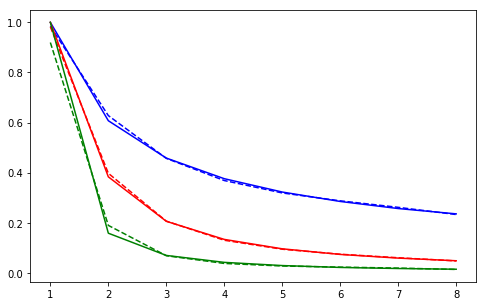

In [19]:
# First try, Polynomial fitting

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

fig, ax = plt.subplots(figsize=(8, 5))

for cost, color in zip([29,49,99], ['b','r','g']):

    X = df_cost[df_cost.subscription_monthly_cost == cost].billing_cycles.values
    y = df_cost[df_cost.subscription_monthly_cost == cost].ratio.values
    
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(np.array(X).reshape(-1,1))
    linear = LinearRegression()
    linear.fit(X_poly, np.log(y))
    y_pred = linear.predict(X_poly)
    ax.plot(X,y,c = color)
    ax.plot(X,np.exp(y_pred),'--', c = color)
    
    print(cost, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
    print(cost, 'R square score: ', r2_score(np.log(y), y_pred))

In [20]:
np.array([X, X**2, np.log(X)]).T

array([[ 1.        ,  1.        ,  0.        ],
       [ 2.        ,  4.        ,  0.69314718],
       [ 3.        ,  9.        ,  1.09861229],
       [ 4.        , 16.        ,  1.38629436],
       [ 5.        , 25.        ,  1.60943791],
       [ 6.        , 36.        ,  1.79175947],
       [ 7.        , 49.        ,  1.94591015],
       [ 8.        , 64.        ,  2.07944154]])

29 Mean squared error:  1.3477842315349766e-06
29 R square score:  0.9999935384727687
49 Mean squared error:  6.670516329312496e-05
49 R square score:  0.9999279019060077
99 Mean squared error:  0.0003201028099329459
99 R square score:  0.9998145647660769


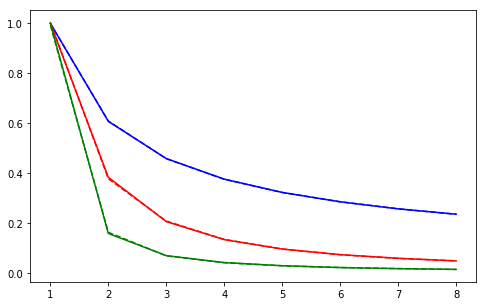

In [21]:
# Second try with log(x), looks good

fig, ax = plt.subplots(figsize=(8, 5))

for cost, color in zip([29,49,99], ['b','r','g']):

    X = df_cost[df_cost.subscription_monthly_cost == cost].billing_cycles.values
    y = df_cost[df_cost.subscription_monthly_cost == cost].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    y_pred = linear.predict(X_)
    ax.plot(X,y,c = color)
    ax.plot(X,np.exp(y_pred),'--', c = color)
    
    print(cost, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
    print(cost, 'R square score: ', r2_score(np.log(y), y_pred))

99 Mean squared error:  0.0014288487533410412
99 R square score:  0.9991072081044035


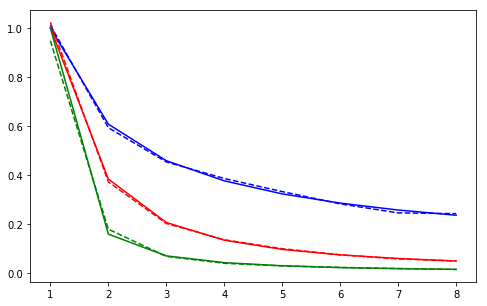

In [22]:
X = df_cost[['subscription_monthly_cost','billing_cycles']].values
y = df_cost.ratio.values

fig, ax = plt.subplots(figsize=(8, 5))

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

linear = LinearRegression()
linear.fit(X_poly, np.log(y))
y_pred = linear.predict(X_poly)
ax.plot(X[:8,1],y[:8],c = 'b')
ax.plot(X[:8,1],np.exp(y_pred)[:8],'--', c = 'b')
ax.plot(X[8:16,1],y[8:16],c = 'r')
ax.plot(X[8:16,1],np.exp(y_pred)[8:16],'--', c = 'r')
ax.plot(X[16:24,1],y[16:24],c = 'g')
ax.plot(X[16:24,1],np.exp(y_pred)[16:24],'--', c = 'g')

print(cost, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
print(cost, 'R square score: ', r2_score(np.log(y), y_pred))

99 Mean squared error:  0.12738636936391126
99 R square score:  0.9204047888822151


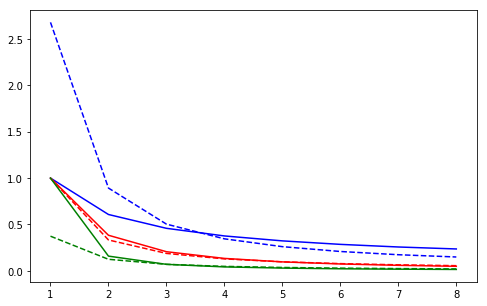

In [23]:
# Do it again, not very good

X = df_cost[['subscription_monthly_cost','billing_cycles']].values
y = df_cost.ratio.values

fig, ax = plt.subplots(figsize=(8, 5))

X_ = []
for i,j,k,l,t in zip(X,X**2,X**3,X**4,np.log(X)):
    X_.append(list(i)+list(j)+list(k)+list(l)+list(t))

linear = LinearRegression()
linear.fit(X_, np.log(y))
y_pred = linear.predict(X_)
ax.plot(X[:8,1],y[:8],c = 'b')
ax.plot(X[:8,1],np.exp(y_pred)[:8],'--', c = 'b')
ax.plot(X[8:16,1],y[8:16],c = 'r')
ax.plot(X[8:16,1],np.exp(y_pred)[8:16],'--', c = 'r')
ax.plot(X[16:24,1],y[16:24],c = 'g')
ax.plot(X[16:24,1],np.exp(y_pred)[16:24],'--', c = 'g')

print(cost, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
print(cost, 'R square score: ', r2_score(np.log(y), y_pred))


### Try to work on more general case

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country2'] = encoder.fit_transform(df['country'])
df['source2'] = encoder.fit_transform(df['source'])

df2 = df.groupby(['subscription_monthly_cost','country2','source2',
                  'billing_cycles']).size().reset_index(name = 'counts')

df2.head()

,subscription_monthly_cost,country2,source2,billing_cycles,counts
0,29,0,0,1,2981
1,29,0,0,2,835
2,29,0,0,3,527
3,29,0,0,4,411
4,29,0,0,5,366


In [25]:
costs = list(df2.subscription_monthly_cost.unique())
countries = list(df2.country2.unique())
sources = list(df2.source2.unique())

In [26]:
ratio_list = []

for cost in costs:
    for country in countries:
        for source in sources:
            total = df[(df.subscription_monthly_cost == cost) & (df.country2 == country)
                      & (df.source2 == source)].shape[0]
            #print(total)
            ratio_list2 = [1]
            ratio = 1
            length = df2[(df2.subscription_monthly_cost == cost) & (df2.country2 == country)
                      & (df2.source2 == source)].shape[0]
            
            for i in range(length-1):
                ratio -= df2[(df2.subscription_monthly_cost == cost) & (df2.country2 == country)
                      & (df2.source2 == source)].iloc[i,4]/total
                ratio_list2.append(ratio)
            #print(ratio_list2)
            ratio_list += ratio_list2
    

In [27]:
df2['ratio'] = ratio_list
df2.head(10)

,subscription_monthly_cost,country2,source2,billing_cycles,counts,ratio
0,29,0,0,1,2981,1.000000
1,29,0,0,2,835,0.784532
2,29,0,0,3,527,0.724178
3,29,0,0,4,411,0.686086
4,29,0,0,5,366,0.656379
5,29,0,0,6,319,0.629924
6,29,0,0,7,288,0.606867
7,29,0,0,8,8108,0.586050
8,29,0,1,1,107,1.000000
9,29,0,1,2,15,0.865239


99 Mean squared error:  0.030772650568762657
99 R square score:  0.9890143707613837


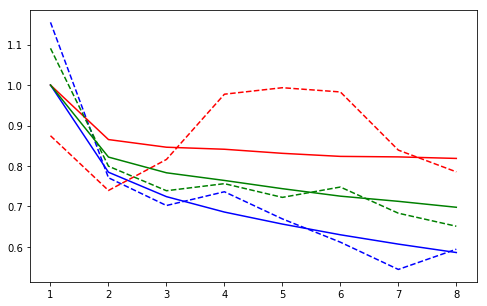

In [28]:
X = df2[['subscription_monthly_cost','country2','source2','billing_cycles']].values
y = df2.ratio.values

fig, ax = plt.subplots(figsize=(8, 5))

poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X)

linear = LinearRegression()
linear.fit(X_poly, np.log(y))
y_pred = linear.predict(X_poly)
ax.plot(X[:8,3],y[:8],c = 'b')
ax.plot(X[:8,3],np.exp(y_pred)[:8],'--', c = 'b')
ax.plot(X[8:16,3],y[8:16],c = 'r')
ax.plot(X[8:16,3],np.exp(y_pred)[8:16],'--', c = 'r')
ax.plot(X[16:24,3],y[16:24],c = 'g')
ax.plot(X[16:24,3],np.exp(y_pred)[16:24],'--', c = 'g')

print(cost, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
print(cost, 'R square score: ', r2_score(np.log(y), y_pred))

### Go back to special case, groupby countries

In [29]:
df_country = df.groupby(['country','billing_cycles']).size().reset_index(name = 'counts')
df_country

,country,billing_cycles,counts
0,China,1,17436
1,China,2,4027
2,China,3,1522
3,China,4,868
4,China,5,590
5,China,6,459
6,China,7,418
7,China,8,10618
8,France,1,34358
9,France,2,8122


In [30]:
df_country.country.unique()

array(['China', 'France', 'Germany', 'India', 'Italy', 'Spain', 'UK',
       'US'], dtype=object)

In [31]:
countries = ['China', 'France', 'Germany', 'India', 'Italy', 'Spain', 'UK', 'US']

ratio_list = []
for country in countries:
    total = df[df.country == country].shape[0]
    ratio_list2 = [1]
    ratio = 1
    for i in range(0,7):
        ratio -= df_country[df_country.country == country].iloc[i,2]/total
        ratio_list2.append(ratio)
    ratio_list += ratio_list2
    
    
df_country['ratio'] = ratio_list
df_country.head(10)

,country,billing_cycles,counts,ratio
0,China,1,17436,1.000000
1,China,2,4027,0.514831
2,China,3,1522,0.402777
3,China,4,868,0.360426
4,China,5,590,0.336274
5,China,6,459,0.319856
6,China,7,418,0.307084
7,China,8,10618,0.295453
8,France,1,34358,1.000000
9,France,2,8122,0.334946


China Mean squared error:  3.699055405957719e-05
China R square score:  0.9997436815807045
France Mean squared error:  3.613024947117546e-05
France R square score:  0.9999600697027134
Germany Mean squared error:  4.587966329088186e-06
Germany R square score:  0.9999929522534934
India Mean squared error:  3.625486153591209e-05
India R square score:  0.9998334251045938
Italy Mean squared error:  0.00012539366355359994
Italy R square score:  0.9998626911230971
Spain Mean squared error:  6.203465576598353e-05
Spain R square score:  0.9999322901432294
UK Mean squared error:  5.311351376144693e-06
UK R square score:  0.9999917620813829
US Mean squared error:  2.9401768543134466e-06
US R square score:  0.9999954538703617


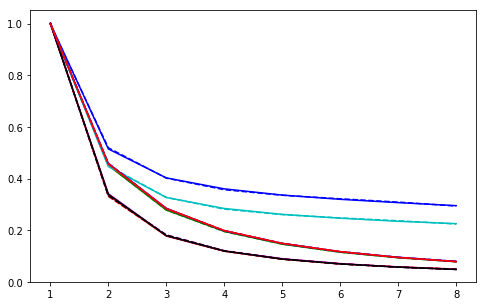

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

for country, color in zip(countries, ['b','r','g','c','m','k','b','r']):

    X = df_country[df_country.country == country].billing_cycles.values
    y = df_country[df_country.country == country].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    y_pred = linear.predict(X_)
    ax.plot(X,y,c = color)
    ax.plot(X,np.exp(y_pred),'--', c = color)
    
    print(country, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
    print(country, 'R square score: ', r2_score(np.log(y), y_pred))

### Group by Sources

In [33]:
df_source = df.groupby(['source','billing_cycles']).size().reset_index(name = 'counts')
df_source

,source,billing_cycles,counts
0,ads,1,253293
1,ads,2,69125
2,ads,3,28800
3,ads,4,15604
4,ads,5,9498
5,ads,6,6336
6,ads,7,4360
7,ads,8,27453
8,friend_referral,1,7342
9,friend_referral,2,2013


In [34]:
sources = ['ads', 'friend_referral', 'seo']

ratio_list = []
for source in sources:
    total = df[df.source == source].shape[0]
    ratio_list2 = [1]
    ratio = 1
    for i in range(0,7):
        ratio -= df_source[df_source.source == source].iloc[i,2]/total
        ratio_list2.append(ratio)
    ratio_list += ratio_list2
    
    
df_source['ratio'] = ratio_list
df_source

,source,billing_cycles,counts,ratio
0,ads,1,253293,1.000000
1,ads,2,69125,0.388873
2,ads,3,28800,0.222094
3,ads,4,15604,0.152607
4,ads,5,9498,0.114959
5,ads,6,6336,0.092043
6,ads,7,4360,0.076756
7,ads,8,27453,0.066237
8,friend_referral,1,7342,1.000000
9,friend_referral,2,2013,0.699443


ads Mean squared error:  1.0279129860335399e-05
ads R square score:  0.99998619738651
friend_referral Mean squared error:  7.797596310463524e-05
friend_referral R square score:  0.9987817393229609
seo Mean squared error:  2.034113421145695e-05
seo R square score:  0.9999220282279101


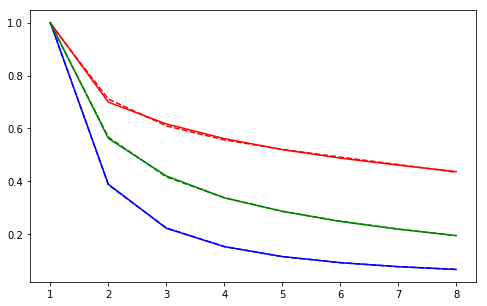

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))

for source, color in zip(sources, ['b','r','g']):

    X = df_source[df_source.source == source].billing_cycles.values
    y = df_source[df_source.source == source].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    y_pred = linear.predict(X_)
    ax.plot(X,y,c = color)
    ax.plot(X,np.exp(y_pred),'--', c = color)
    
    print(source, 'Mean squared error: ', mean_squared_error(np.log(y), y_pred))
    print(source, 'R square score: ', r2_score(np.log(y), y_pred))

## Question 2

Based on your model, for each price point, what percentage of users is still subscribed after at least 12 months?

In [36]:
for cost in [29,49,99]:

    X = df_cost[df_cost.subscription_monthly_cost == cost].billing_cycles.values
    y = df_cost[df_cost.subscription_monthly_cost == cost].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    X_test = 12
    X_test = np.array([[X_test, X_test**2., np.log(X_test)]])
    y_pred = linear.predict(X_test)
    #ax.plot(X,y,c = color)
    #ax.plot(X,np.exp(y_pred),'--', c = color)
    
    print(cost, 'at 12th month', np.exp(y_pred))

29 at 12th month [0.17892454]
49 at 12th month [0.03210689]
99 at 12th month [0.00559856]


In [37]:
for country in countries:

    X = df_country[df_country.country == country].billing_cycles.values
    y = df_country[df_country.country == country].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    
    X_test = 12
    X_test = np.array([[X_test, X_test**2., np.log(X_test)]])
    
    y_pred = linear.predict(X_test)
    print(country, 'at 12th month', np.exp(y_pred))

China at 12th month [0.19165352]
France at 12th month [0.03314618]
Germany at 12th month [0.04484541]
India at 12th month [0.14261045]
Italy at 12th month [0.02928391]
Spain at 12th month [0.03034261]
UK at 12th month [0.04590917]
US at 12th month [0.04352249]


In [38]:
for source in sources:

    X = df_source[df_source.source == source].billing_cycles.values
    y = df_source[df_source.source == source].ratio.values
    
    X_ = np.array([X, X**2, np.log(X)]).T
    
    linear = LinearRegression()
    linear.fit(X_, np.log(y))
    
    X_test = 12
    X_test = np.array([[X_test, X_test**2., np.log(X_test)]])
    
    y_pred = linear.predict(X_test)
    
    print(source, 'at 12th month', np.exp(y_pred))

ads at 12th month [0.04654553]
friend_referral at 12th month [0.29780424]
seo at 12th month [0.1173221]


### Question 3

How do user country and source affect subscription retention rate? How would you use these findings to improve the company revenue?

See above.